In [1]:
import os
os.chdir('../')

import pandas as pd
from typing import Literal
import time

from src.K_means import generalized_Kmeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Fonction k_means_quality_test pour faire plusieurs tests à la fois 

In [3]:
from sklearn.decomposition import PCA

def k_means_quality_test(df: pd.DataFrame, n_clusters: int, nb_estimators: int, init_method: Literal['kmeans++', 'random-partition', 'guided_PCA', 'forgy']):
    """
    returns a list with the inertia values of the nb_estimators times the kmeans algorithm 
    """
    inertia_values = []

    # technicalité pour ne pas recalculer à chaque itération la réduction avec l'ACP
    if init_method == 'guided_PCA':
        pca = PCA(n_components=n_clusters)
        df_pca = pca.fit_transform(df.values)

    for i in range(nb_estimators):
        if init_method == 'guided_PCA':
            kmeans = generalized_Kmeans(k=n_clusters, init=init_method, df_PCA=df_pca, model_PCA=pca)
        else:
            kmeans = generalized_Kmeans(k=n_clusters, init=init_method)
        kmeans.fit(df.values)
        cluster_labels = kmeans.predict(df.values)

        # Obtenir la distorsion (inertie)
        inertia_values.append(kmeans.loss_)

    return sorted(inertia_values, reverse=True)

## MNIST df (from the article)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn import metrics

# Charger l'ensemble de données MNIST depuis scikit-learn
mnist = fetch_openml('mnist_784')Ò
data = mnist.data
labels = mnist.target.astype(int)
data['label'] = labels

In [5]:
# On se ramène aux conditions de l'article
# Conserver seulement les 50 premières instances de chaque classe
df_MNIST = data.groupby('label').head(50).reset_index(drop=True).drop(columns=['label'])

# center the data
df_MNIST = df_MNIST - df_MNIST.mean(axis=0)

In [6]:
start_time = time.time()
kmeans_guided_PCA_inertia_values = k_means_quality_test(df=df_MNIST, n_clusters=10,  nb_estimators=1000, init_method='guided_PCA')
end_time = time.time()
execution_time_guided_PCA = end_time - start_time

In [7]:
start_time = time.time()
kmeans_plus_plus_inertia_values = k_means_quality_test(df=df_MNIST, n_clusters=10, nb_estimators=1000, init_method='kmeans++')
end_time = time.time()
execution_time_plus_plus = end_time - start_time

In [8]:
start_time = time.time()
kmeans_forgy_inertia_values = k_means_quality_test(df=df_MNIST, n_clusters=10, nb_estimators=1000, init_method='forgy')
end_time = time.time()
execution_time_forgy = end_time - start_time

In [9]:
start_time = time.time()
kmeans_random_partition_inertia_values = k_means_quality_test(df=df_MNIST, n_clusters=10, nb_estimators=1000, init_method='random-partition')
end_time = time.time()
execution_time_random_partition = end_time - start_time

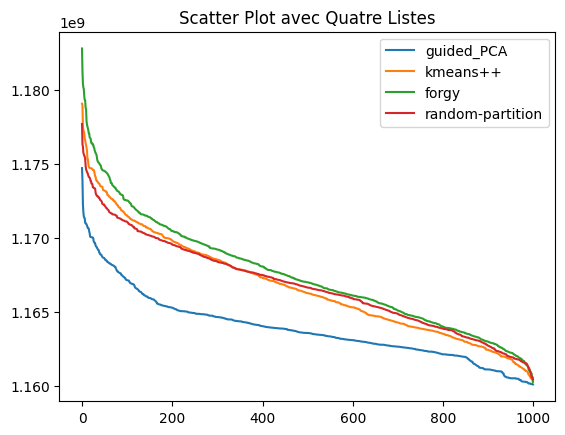

In [10]:
import matplotlib.pyplot as plt

# Valeurs de l'axe des x (0 jusqu'à n-1)
x = list(range(len(kmeans_guided_PCA_inertia_values)))

# Création du scatter plot
plt.plot(x, kmeans_guided_PCA_inertia_values, label='guided_PCA')
plt.plot(x, kmeans_plus_plus_inertia_values, label='kmeans++')
plt.plot(x, kmeans_forgy_inertia_values, label='forgy')
plt.plot(x, kmeans_random_partition_inertia_values, label='random-partition')

# Ajout de légendes et d'un titre
plt.legend()
plt.title('Scatter Plot avec Quatre Listes')

# Affichage du graphe
plt.show()


In [11]:
print(f'min inertia of kmeans_guided_PCA = {min(kmeans_guided_PCA_inertia_values)} \n and execution time is {execution_time_guided_PCA}')
print(f'min inertia of kmeans++ = {min(kmeans_plus_plus_inertia_values)} \n and execution time is {execution_time_plus_plus}')
print(f'min inertia of kmeans_forgy = {min(kmeans_forgy_inertia_values)}  \n and execution time is {execution_time_forgy}')
print(f'min inertia of kmeans_random_partition = {min(kmeans_random_partition_inertia_values)} \n and execution time is {execution_time_random_partition}')

min inertia of kmeans_guided_PCA = 1160075039.599726 
 and execution time is 43.239651679992676
min inertia of kmeans++ = 1160334058.3707852 
 and execution time is 409.2432219982147
min inertia of kmeans_forgy = 1160246914.6873934  
 and execution time is 320.59361577033997
min inertia of kmeans_random_partition = 1160427055.3483324 
 and execution time is 329.33872723579407


## fashion MNIST df

In [13]:
import os
os.chdir('../')

def load_fashion_mnist():
    df = pd.read_csv("fashion-mnist_train.csv")
    df.rename(columns={'label':'Target'}, inplace=True)
    return df

In [14]:
data = load_fashion_mnist()

In [15]:
# On se ramène aux conditions de l'article
# Conserver seulement les 50 premières instances de chaque classe
df_fashion_MNIST = data.groupby('Target').head(50).reset_index(drop=True).drop(columns=['Target'])

# center the data
df_fashion_MNIST = df_fashion_MNIST - df_fashion_MNIST.mean(axis=0)

In [16]:
start_time = time.time()
kmeans_guided_PCA_inertia_values = k_means_quality_test(df=df_fashion_MNIST, n_clusters=10,  nb_estimators=1000, init_method='guided_PCA')
end_time = time.time()
execution_time_guided_PCA = end_time - start_time

In [17]:
start_time = time.time()
kmeans_plus_plus_inertia_values = k_means_quality_test(df=df_fashion_MNIST, n_clusters=10, nb_estimators=1000, init_method='kmeans++')
end_time = time.time()
execution_time_plus_plus = end_time - start_time

In [18]:
start_time = time.time()
kmeans_forgy_inertia_values = k_means_quality_test(df=df_fashion_MNIST, n_clusters=10, nb_estimators=1000, init_method='forgy')
end_time = time.time()
execution_time_forgy = end_time - start_time

In [19]:
start_time = time.time()
kmeans_random_partition_inertia_values = k_means_quality_test(df=df_fashion_MNIST, n_clusters=10, nb_estimators=1000, init_method='random-partition')
end_time = time.time()
execution_time_random_partition = end_time - start_time

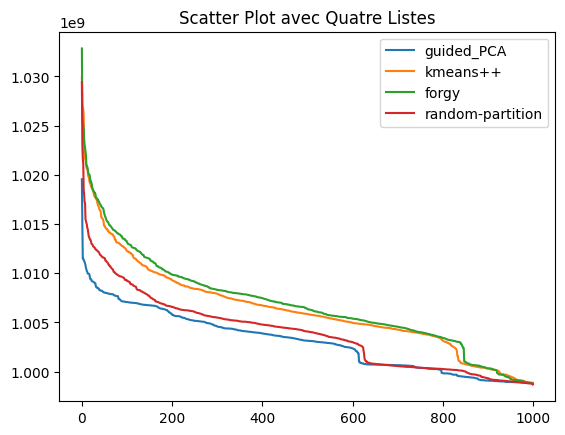

In [20]:
import matplotlib.pyplot as plt

# Valeurs de l'axe des x (0 jusqu'à n-1)
x = list(range(len(kmeans_guided_PCA_inertia_values)))

# Création du scatter plot
plt.plot(x, kmeans_guided_PCA_inertia_values, label='guided_PCA')
plt.plot(x, kmeans_plus_plus_inertia_values, label='kmeans++')
plt.plot(x, kmeans_forgy_inertia_values, label='forgy')
plt.plot(x, kmeans_random_partition_inertia_values, label='random-partition')

# Ajout de légendes et d'un titre
plt.legend()
plt.title('Scatter Plot avec Quatre Listes')

# Affichage du graphe
plt.show()


In [21]:
print(f'min inertia of kmeans_guided_PCA = {min(kmeans_guided_PCA_inertia_values)} \n and execution time is {execution_time_guided_PCA}')
print(f'min inertia of kmeans++ = {min(kmeans_plus_plus_inertia_values)} \n and execution time is {execution_time_plus_plus}')
print(f'min inertia of kmeans_forgy = {min(kmeans_forgy_inertia_values)}  \n and execution time is {execution_time_forgy}')
print(f'min inertia of kmeans_random_partition = {min(kmeans_random_partition_inertia_values)} \n and execution time is {execution_time_random_partition}')

min inertia of kmeans_guided_PCA = 998858643.5686198 
 and execution time is 39.423380851745605
min inertia of kmeans++ = 998805624.5900462 
 and execution time is 453.45451378822327
min inertia of kmeans_forgy = 998746246.9834282  
 and execution time is 357.1619851589203
min inertia of kmeans_random_partition = 998699825.8415183 
 and execution time is 350.0761778354645
